In [1]:
import numpy as np
import pandas as pd

from skmultiflow.meta import LearnPPNSEClassifier

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/electricity-normalized.csv')
y_ = (df['class']=='UP').astype(int)
del df['class']

In [3]:
df.head(3)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912


In [76]:
learn_pp_nse = LearnPPNSEClassifier(window_size=300)
n = 350
learn_pp_nse.fit(df[df.index<n].to_numpy(), y_[y_.index<n].to_numpy(), classes=[0, 1])

LearnPPNSEClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
                     crossing_point=10, n_estimators=15, pruning=None,
                     slope=0.5, window_size=300)

In [13]:
model = LearnPPNSEClassifier(window_size=300)
batch_size = 1000
df = pd.read_csv('dataset/electricity-normalized.csv')
y = (df['class']=='UP').astype(int)
del df['class']


In [14]:
y

0        1
1        1
2        1
3        1
4        0
        ..
45307    0
45308    0
45309    0
45310    1
45311    0
Name: class, Length: 45312, dtype: int64

In [29]:
model = LearnPPNSEClassifier(window_size=1600, n_estimators=25, pruning='error')
batch_size = 1000
df = pd.read_csv('dataset/electricity-normalized.csv')
del df['date']
y = (df['class']=='UP').astype(int)
del df['class']

results = []
correct_cnt, samples = 0, 0
df__, y__ = df[df.index<batch_size].to_numpy(), y[y.index<batch_size].to_numpy()
model.fit(df__, y__, classes=[0, 1])

for i in range(batch_size, len(df)-2*batch_size, batch_size):
    X, y_ = df[(df.index >= i) & (df.index < i+batch_size)].to_numpy() , y[(y.index >= i) & (y.index < i+batch_size)].to_numpy()
    y_pred = model.predict(X)
    correct_cnt += sum(y_ == y_pred)
    samples += 1000
    results.append(sum(y_ == y_pred)/1000)
    model.partial_fit(X, y_, classes=[0, 1])
print(j)
print('Learn++.NSE classifier accuracy: {}'.format(correct_cnt / len(df)))

5000
Learn++.NSE classifier accuracy: 0.6783854166666666


In [30]:
model = LearnPPNSEClassifier(window_size=1600, n_estimators=25, pruning='age')
batch_size = 1000
df = pd.read_csv('dataset/electricity-normalized.csv')
del df['date']
y = (df['class']=='UP').astype(int)
del df['class']

results = []
correct_cnt, samples = 0, 0
df__, y__ = df[df.index<batch_size].to_numpy(), y[y.index<batch_size].to_numpy()
model.fit(df__, y__, classes=[0, 1])

for i in range(batch_size, len(df)-2*batch_size, batch_size):
    X, y_ = df[(df.index >= i) & (df.index < i+batch_size)].to_numpy() , y[(y.index >= i) & (y.index < i+batch_size)].to_numpy()
    y_pred = model.predict(X)
    correct_cnt += sum(y_ == y_pred)
    samples += 1000
    results.append(sum(y_ == y_pred)/1000)
    model.partial_fit(X, y_, classes=[0, 1])
print(j)
print('Learn++.NSE classifier accuracy: {}'.format(correct_cnt / len(df)))

5000
Learn++.NSE classifier accuracy: 0.6802833686440678


In [36]:
model = LearnPPNSEClassifier(window_size=3000, n_estimators=25, pruning='age')
batch_size = 1000
df = pd.read_csv('dataset/electricity-normalized.csv')
del df['date']
y = (df['class']=='UP').astype(int)
del df['class']

results = []
correct_cnt, samples = 0, 0
df__, y__ = df[df.index<batch_size].to_numpy(), y[y.index<batch_size].to_numpy()
model.fit(df__, y__, classes=[0, 1])

for i in range(batch_size, len(df)-2*batch_size, batch_size):
    X, y_ = df[(df.index >= i) & (df.index < i+batch_size)].to_numpy() , y[(y.index >= i) & (y.index < i+batch_size)].to_numpy()
    y_pred = model.predict(X)
    correct_cnt += sum(y_ == y_pred)
    samples += 1000
    results.append(sum(y_ == y_pred)/1000)
    model.partial_fit(X, y_, classes=[0, 1])
print(j)
print('Learn++.NSE classifier accuracy: {}'.format(correct_cnt / len(df)))

5000
Learn++.NSE classifier accuracy: 0.6673066737288136


In [18]:
for j in [800, 1600, 3000, 5000]:
    model = LearnPPNSEClassifier(window_size=j, n_estimators=25)
    batch_size = 1000
    df = pd.read_csv('dataset/electricity-normalized.csv')
    del df['date']
    y = (df['class']=='UP').astype(int)
    del df['class']

    results = []
    correct_cnt, samples = 0, 0
    df__, y__ = df[df.index<batch_size].to_numpy(), y[y.index<batch_size].to_numpy()
    model.fit(df__, y__, classes=[0, 1])

    for i in range(batch_size, len(df)-2*batch_size, batch_size):
        X, y_ = df[(df.index >= i) & (df.index < i+batch_size)].to_numpy() , y[(y.index >= i) & (y.index < i+batch_size)].to_numpy()
        y_pred = model.predict(X)
        correct_cnt += sum(y_ == y_pred)
        samples += 1000
        results.append(sum(y_ == y_pred)/1000)
        model.partial_fit(X, y_, classes=[0, 1])
    print(j)
    print('Learn++.NSE classifier accuracy: {}'.format(correct_cnt / len(df)))

800
Learn++.NSE classifier accuracy: 0.6770612641242938
1600
Learn++.NSE classifier accuracy: 0.6906117584745762
3000
Learn++.NSE classifier accuracy: 0.6704846398305084
5000
Learn++.NSE classifier accuracy: 0.6507989053672316


In [22]:
%%time
for j in [800, 1600, 3000, 5000]:
    model = LearnPPNSEClassifier(window_size=j, n_estimators=25)
    batch_size = 1000
    df = pd.read_csv('dataset/electricity-normalized.csv')
    del df['date']
    y = (df['class']=='UP').astype(int)
    del df['class']

    results = []
    correct_cnt, samples = 0, 0
    df__, y__ = df[df.index<batch_size].to_numpy(), y[y.index<batch_size].to_numpy()
    model.fit(df__, y__, classes=[0, 1])

    for i in range(batch_size, len(df)-2*batch_size, batch_size):
        X, y_ = df[(df.index >= i) & (df.index < i+batch_size)].to_numpy() , y[(y.index >= i) & (y.index < i+batch_size)].to_numpy()
        y_pred = model.predict(X)
        correct_cnt += sum(y_ == y_pred)
        samples += 1000
        results.append(sum(y_ == y_pred)/1000)
        model.partial_fit(X, y_, classes=[0, 1])
    print(j)
    print('Learn++.NSE classifier accuracy: {}'.format(correct_cnt / len(df)))

800
Learn++.NSE classifier accuracy: 0.6859551553672316
1600
Learn++.NSE classifier accuracy: 0.679643361581921
3000
Learn++.NSE classifier accuracy: 0.663135593220339
5000
Learn++.NSE classifier accuracy: 0.627339336158192
CPU times: user 5min 41s, sys: 686 ms, total: 5min 42s
Wall time: 5min 40s


In [37]:
~42

-43

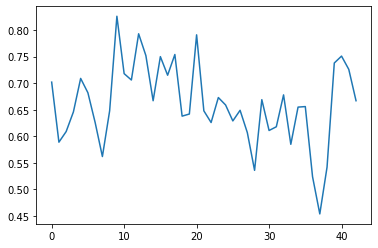

In [28]:
plt.plot(results)

In [23]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [25]:
LearnPPNSEClassifier(window_size=j, n_estimators=25, base_estimator=tree.DecisionTreeClassifier())

LearnPPNSEClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
                     crossing_point=10, n_estimators=25, pruning=None,
                     slope=0.5, window_size=5000)

In [26]:
LearnPPNSEClassifier(window_size=j, n_estimators=25)

LearnPPNSEClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
                     crossing_point=10, n_estimators=25, pruning=None,
                     slope=0.5, window_size=5000)

In [126]:
# Imports
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import LearnPPNSEClassifier
# Setup a data stream
stream = SEAGenerator(random_state=1)
# Setup Learn++.NSE Classifier
learn_pp_nse = LearnPPNSEClassifier()
# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = 2000
i = 0
batch = 1
# Train the classifier with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = df[(df.index >= i) & (df.index < i+batch)].to_numpy() , y_[(y_.index >= i) & (y_.index < i+batch)].to_numpy()
    y_pred = learn_pp_nse.predict(X)
    #if y[0] == y_pred[0]:
    #    correct_cnt += 1
    learn_pp_nse.partial_fit(X, y, classes=[0, 1])
    n_samples += 1
    i+=1
# Display results
print('{} samples analyzed.'.format(n_samples))
print('Learn++.NSE classifier accuracy: {}'.format(correct_cnt / n_samples))

2000 samples analyzed.
Learn++.NSE classifier accuracy: 0.0


In [122]:
i

250

In [121]:
X.to_numpy(), y.to_numpy()

(array([[2.21000e-04, 7.00000e+00, 2.12766e-01, 6.38890e-02, 6.42670e-02,
         3.46700e-03, 4.22915e-01, 4.14912e-01]]),
 array([1]))

In [125]:
X, y

(array([[4.79355197, 6.74658793, 6.84230726]]), array([1]))

In [134]:
%%time
score_elec(LearnPPNSEClassifier(window_size=120, n_estimators=25), 120)

Learn++.NSE classifier accuracy: 0.7234066031073446
CPU times: user 2min 38s, sys: 340 ms, total: 2min 39s
Wall time: 2min 38s


In [138]:
%%time
score_elec(LearnPPNSEClassifier(window_size=377, n_estimators=25), 377)

Learn++.NSE classifier accuracy: 0.6906117584745762
CPU times: user 2min 12s, sys: 342 ms, total: 2min 13s
Wall time: 2min 12s


In [142]:
%%time
for estimator in [15, 25, 40]:
    for batch in [100, 200, 300, 400, 500]:
        for memory in [100, 200, 500, 1000]:
            if batch > memory:
                pass
            else:
                print('estimato : {}, batch: {}, memory: {}'.format(estimator, batch, memory))
                score_elec(LearnPPNSEClassifier(window_size=memory, n_estimators=estimator), batch)

estimato : 15, batch: 100, memory: 100
Learn++.NSE classifier accuracy: 0.7218396892655368
estimato : 15, batch: 100, memory: 200
Learn++.NSE classifier accuracy: 0.7234507415254238
estimato : 15, batch: 100, memory: 500
Learn++.NSE classifier accuracy: 0.72217072740113
estimato : 15, batch: 100, memory: 1000
Learn++.NSE classifier accuracy: 0.7225900423728814
estimato : 15, batch: 200, memory: 200
Learn++.NSE classifier accuracy: 0.7260107697740112
estimato : 15, batch: 200, memory: 500
Learn++.NSE classifier accuracy: 0.7149320268361582
estimato : 15, batch: 200, memory: 1000
Learn++.NSE classifier accuracy: 0.7144906426553672
estimato : 15, batch: 300, memory: 500
Learn++.NSE classifier accuracy: 0.7064795197740112
estimato : 15, batch: 300, memory: 1000
Learn++.NSE classifier accuracy: 0.7133209745762712
estimato : 15, batch: 400, memory: 500
Learn++.NSE classifier accuracy: 0.7035443149717514
estimato : 15, batch: 400, memory: 1000
Learn++.NSE classifier accuracy: 0.70934851694915

In [135]:
(len(y_)-y_.sum())/len(df)

0.5754546257062146

In [9]:
correct_cnt

1095

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912
...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579


In [52]:
len(df)-y_.sum()

369172

In [48]:
# Elec DataSet

numpy.ndarray

In [109]:
# Setup a data stream
stream = SEAGenerator(random_state=1)
# Setup Learn++.NSE Classifier
learn_pp_nse = LearnPPNSEClassifier()
# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = 200
# Train the classifier with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = learn_pp_nse.predict(X)
    if y == y_pred[0]:
        correct_cnt += 1
    learn_pp_nse.partial_fit(X, y, classes=stream.target_values)
    n_samples += 1
    break
# Display results
print('{} samples analyzed.'.format(n_samples))
print('Learn++.NSE classifier accuracy: {}'.format(correct_cnt / n_samples))

1 samples analyzed.
Learn++.NSE classifier accuracy: 0.0


In [14]:
X

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03]])

In [17]:
import numpy as np

In [31]:
stream.target_values

[0, 1]

In [22]:
y_ = df['target']
del df['target']

In [10]:
y.unique()

NameError: name 'y' is not defined

In [49]:
y

3

In [50]:

# Imports
from skmultiflow.data import SEAGenerator
from skmultiflow.meta import LearnPPNSEClassifier
# Setup a data stream
stream = SEAGenerator(random_state=1)
# Setup Learn++.NSE Classifier
learn_pp_nse = LearnPPNSEClassifier()
# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0

# Train the classifier with the samples provided by the data stream
for i in range(len(df)):
    X, y = df[df.index == i], y_[i]
    y_pred = learn_pp_nse.predict(X)
    print(y_pred, y)
    if y_[i] == y_pred[0]:
        correct_cnt += 1
    try:
        learn_pp_nse.partial_fit(X, [y_[i]], classes=[3, 6, 4, 2, 1, 5, 7])
    except:
        print('Fail')
    if i%10000 == 0:
        print(correct_cnt)
# Display results

[0] 3
0
[0] 3
[0] 3
[0] 6
[0] 3
[0] 3
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 3
[0] 6
[0] 6
[0] 3
[0] 3
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 3
[0] 3
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 3
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 3
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 3
[0] 3
[0] 6
[0] 3
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 3
[0] 3
[0] 3
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 6
[0] 3
[0] 6
[0] 6
[0] 3
[0] 6
[0] 3
[0] 6
[0] 6
[0] 3
[0] 3
[0] 6
[0

KeyboardInterrupt: 

In [47]:
y_pred[0] == 0

True

In [33]:
X

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
249,1926.0,41.0,38.0,30.0,5.0,42.0,195.0,130.0,39.0,295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#print(data['DESCR'])

In [9]:

for i in range(len(df)):
    adwin.add_element(df['target'][i])
    if adwin.detected_change():
        c.append(i)


(581012, 55)

In [10]:

plt.figure(figsize=(30, 5))
plt.plot((df[col]-df[col].max())/(df[col].max()-df[col].min()), linewidth=0.05)
plt.plot((df[0]-df[0].max())/(df[0].max()-df[0].min()))
for i in c:
    plt.vlines(x=i, ymin=0, ymax=1, linewidth=0.2)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,target
0,1859.0,18.0,12.0,67.0,11.0,90.0,211.0,215.0,139.0,792.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [56]:
def two_plots(detector, col, df):
    c = []
    for i in range(len(df)):
        adwin.add_element(df['target'][i])
        if adwin.detected_change():
            c.append(i)

    plt.figure(figsize=(30, 5))
    plt.plot((df[col]-df[col].max())/(df[col].max()-df[col].min()), linewidth=0.05)
    plt.plot((df[0]-df[0].max())/(df[0].max()-df[0].min()))
    for i in c:
        plt.vlines(x=i, ymin=0, ymax=1, linewidth=0.2)
    return

CPU times: user 2min 24s, sys: 7.96 ms, total: 2min 24s
Wall time: 2min 24s


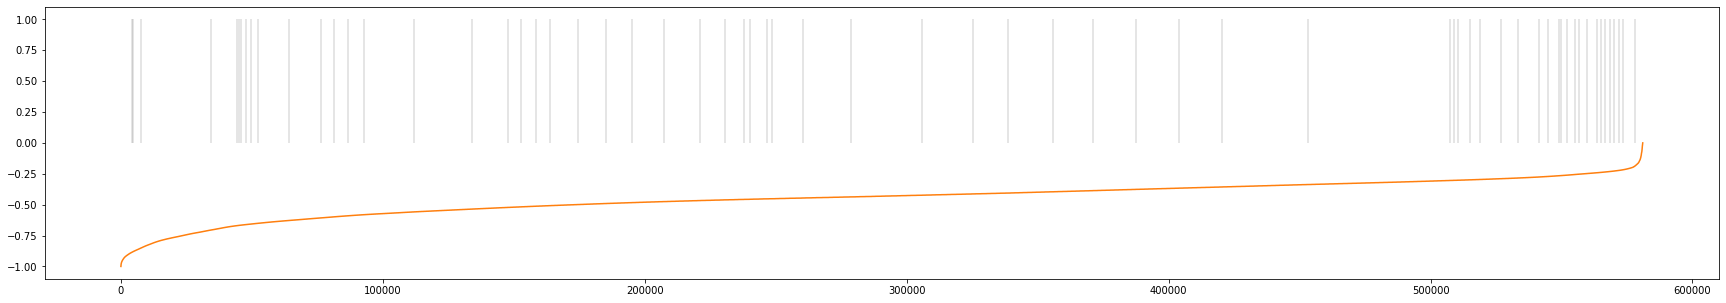

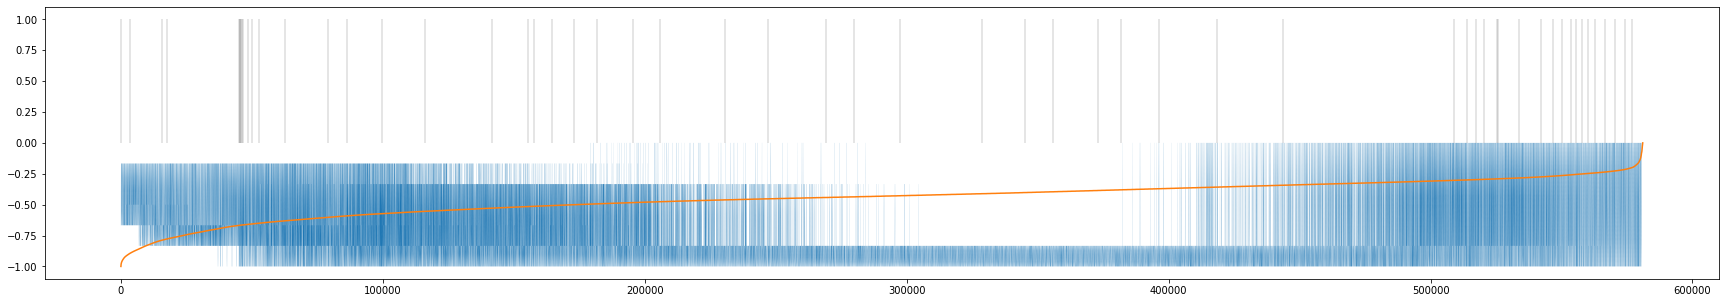

In [57]:
%%time
two_plots(ADWIN(), 0, df)
two_plots(ADWIN(), 'target', df)

CPU times: user 2min 18s, sys: 59.9 ms, total: 2min 18s
Wall time: 2min 18s


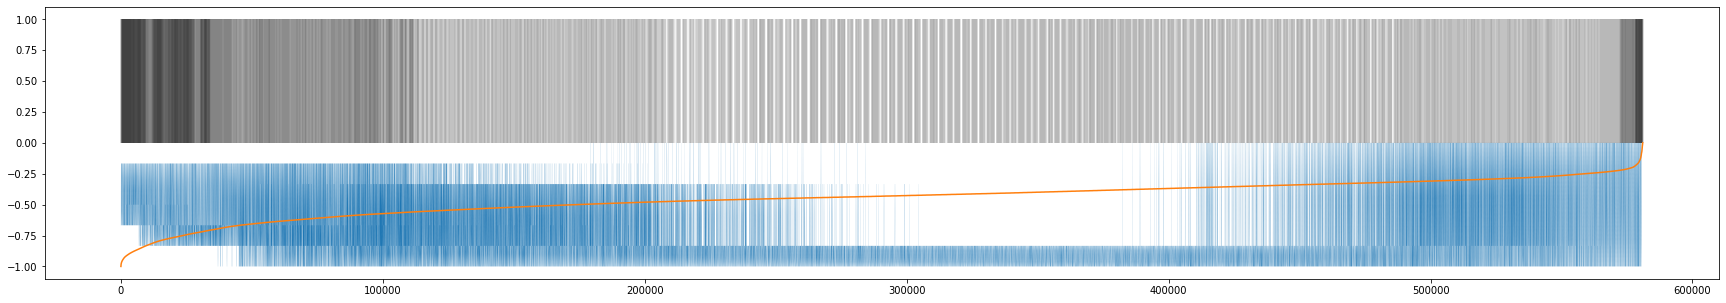

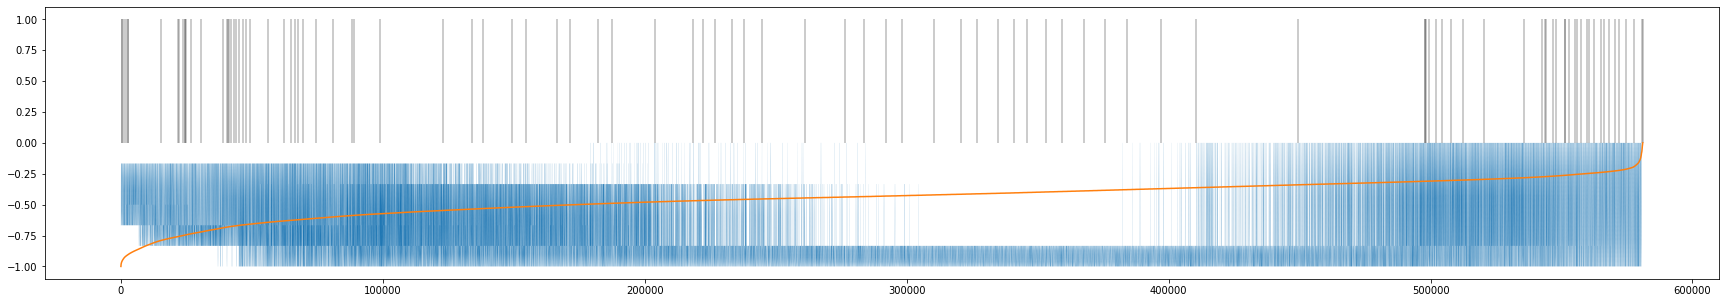

In [52]:
%%time
adwin = ADWIN()
col = 'target'
c = []
for i in range(len(df)):
    adwin.add_element(df[0][i])
    if adwin.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot((df[col]-df[col].max())/(df[col].max()-df[col].min()), linewidth=0.05)
plt.plot((df[0]-df[0].max())/(df[0].max()-df[0].min()))
for i in c:
    plt.vlines(x=i, ymin=0, ymax=1, linewidth=0.1)
    
adwin = ADWIN()

c = []
for i in range(len(df)):
    adwin.add_element(df['target'][i])
    if adwin.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot((df[col]-df[col].max())/(df[col].max()-df[col].min()), linewidth=0.05)
plt.plot((df[0]-df[0].max())/(df[0].max()-df[0].min()))
for i in c:
    plt.vlines(x=i, ymin=0, ymax=1, linewidth=0.4)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/skmultiflow/drift_detection/ddm.py:126: RuntimeWarning: invalid value encountered in sqrt
  self.miss_std = np.sqrt(self.miss_prob * (1 - self.miss_prob) / float(self.sample_count))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/skmultiflow/drift_detection/ddm.py:126: RuntimeWarning: invalid value encountered in sqrt
  self.miss_std = np.sqrt(self.miss_prob * (1 - self.miss_prob) / float(self.sample_count))


CPU times: user 46.9 s, sys: 0 ns, total: 46.9 s
Wall time: 46.9 s


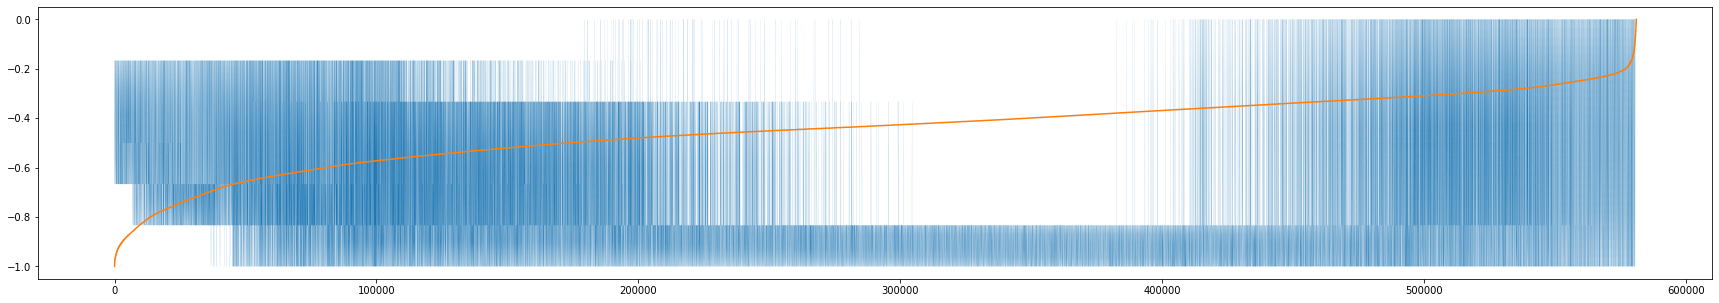

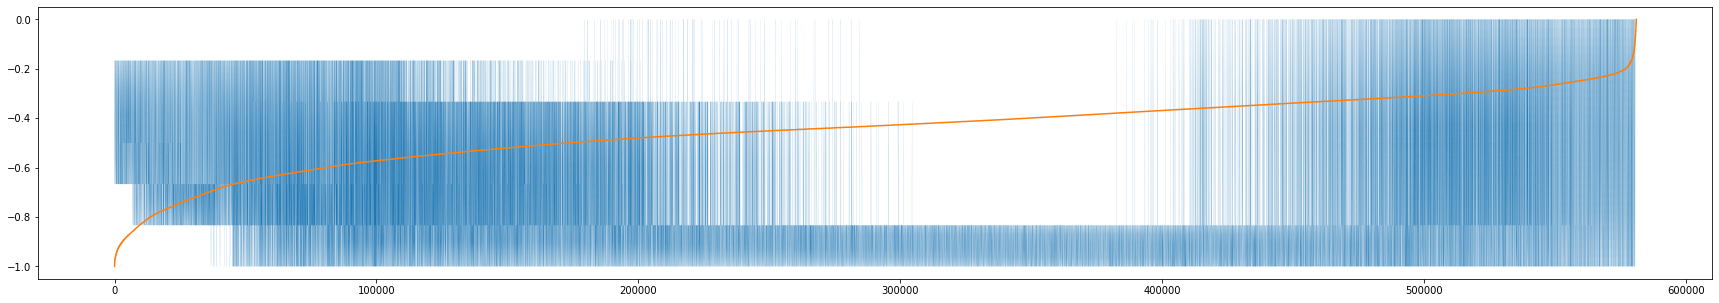

In [53]:
%%time
ddm = DDM()
c = []
for i in range(len(df)):
    ddm.add_element(df[0][i])
    if ddm.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot((df[col]-df[col].max())/(df[col].max()-df[col].min()), linewidth=0.05)
plt.plot((df[0]-df[0].max())/(df[0].max()-df[0].min()))
for i in c:
    plt.vlines(x=i, ymin=0, ymax=1, linewidth=0.1)

ddm = DDM()
c = []
for i in range(len(df)):
    ddm.add_element(df['target'][i])
    if ddm.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot((df[col]-df[col].max())/(df[col].max()-df[col].min()), linewidth=0.05)
plt.plot((df[0]-df[0].max())/(df[0].max()-df[0].min()))
for i in c:
    plt.vlines(x=i, ymin=0, ymax=1, linewidth=0.4)

CPU times: user 30.4 s, sys: 7.93 ms, total: 30.4 s
Wall time: 30.4 s


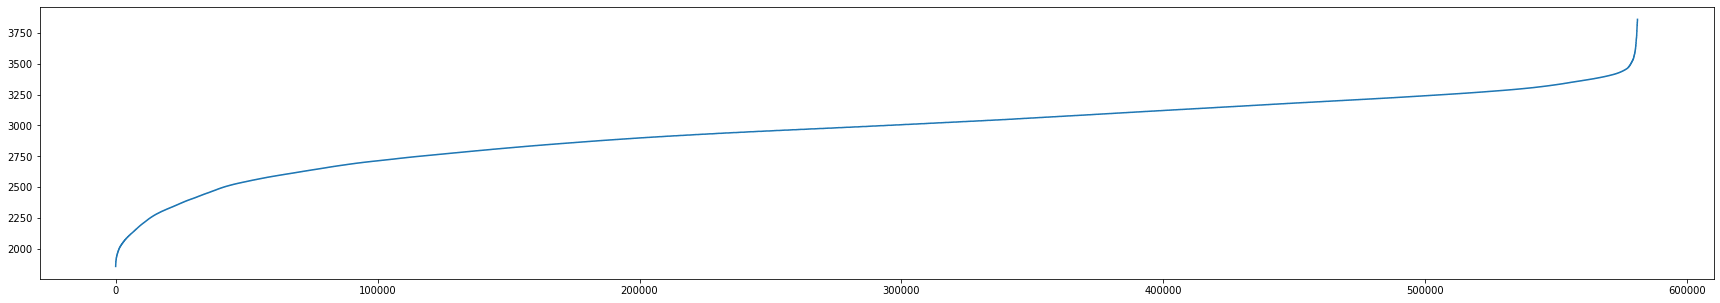

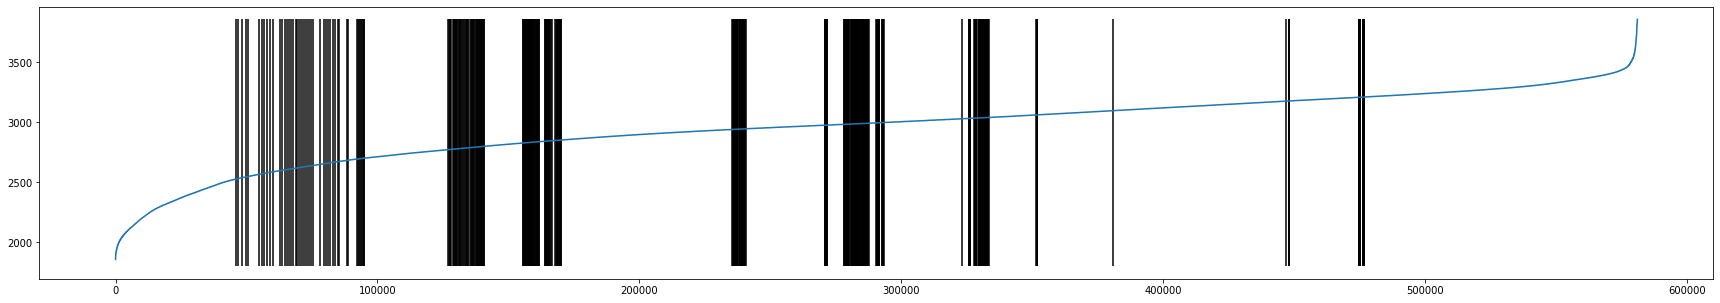

In [26]:
%%time
detector = EDDM(); c = []
for i in range(len(df)):
    detector.add_element(df[0][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('EDDM')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

detector = EDDM(); c = []
for i in range(len(df)):
    detector.add_element(df['target'][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('EDDM')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

In [ ]:
%%time
detector = HDDM_A(); c = []
for i in range(len(df)):
    detector.add_element(df[0][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('HDDM_A')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

detector = HDDM_A(); c = []
for i in range(len(df)):
    detector.add_element(df['target'][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('HDDM_A')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

In [ ]:
%%time
detector = HDDM_W(); c = []
for i in range(len(df)):
    detector.add_element(df[0][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('HDDM_W')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

detector = HDDM_W(); c = []
for i in range(len(df)):
    detector.add_element(df['target'][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('HDDM_W')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

In [ ]:
# %%time
detector = KSWIN(); c = []
for i in range(len(df)):
    detector.add_element(df[0][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('KSWIN')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

detector = KSWIN(); c = []
for i in range(len(df)):
    detector.add_element(df['target'][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('KSWIN')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

In [34]:
%%time
detector = PageHinkley(); c = []
for i in range(len(df)):
    detector.add_element(df[0][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('PageHinkley')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

detector = PageHinkley(); c = []
for i in range(len(df)):
    detector.add_element(df['target'][i])
    if detector.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
plt.title('PageHinkley')
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt

